# Debugging Source Randomness of the FOXSISIM

### @Milo Dec, 2017

### Task 1:

Check how the rays are being generated in the current simulation.

Source is a **Class** that cast rays to a target region (front end of the optics module). It can be one of three types: i) 'atinf' -> source at infinity projecting parallel rays. ii) 'point' -> point source at some real coordinate in 3D-space. iii) 'nonpoint' -> rectangle centered at some real coordinate in 3D-space.


In [2]:
from foxsisim.source import Source
source = Source()

## Documentation:

### Understanding the *Source* 

The **Source** *Class* is constructed with the following *Parameters*: <br>
* *center*: The center location of the Source.  <br>
* *with*: The width of the projection rectangle (atinf or nonpoint). <br>
* *height*: The height o the projection rectangle (atinf or nonpoint).<br>
* *normal*: Direction towards the projection rectangle is facing. <br>
* *type*: 'atinf', 'point', 'nonpoint'. <br>
* *color*: Color of projected rays. <br>
* *pixel*: Optional numpy array of pixel colors (W x H x 3). It's still not clear how this does work. <br>
* *spectrum*: Optional numpy array (2xN) of energy spectrum.  <br>
* *Tag*: 'Source' Tag all rays with 'Source', place where the came from.




### Source Functions: <br>

* **colorAtPoint**: Returns the RGB colors for a list of points. Assumes each point exists on the source surface.<br>
* **generateRays**: returns an array of rays, located at the source and pointed to valid target point (on a module/shell/segement). *Parameters*: targetFunc: a function that generates points on the target plane. *n*: Number of random rays to generate. *grid*: Dimensions of a grid of points to generate (alternative to specify *n*). <br>
* **loadImage**: Loads an image file and stores the pixel values into source (tested with passing None as the file name removes any previously loaded pixels). <br>
* **loadSpectrum**: Loads a function, f(energy_keV), as the energy stectrum for the source.<br>
* **plotImage**: Displays the source background to screen in case you loaded an Image as your source. <br>


In addition **Source** has all functions defined in Class *Plane*. 


## Using Source.generateRays

**generateRays** needs ***targetFunc*** that usually is gotten from Class *Module*, function *targetFront*. <br>

**Module.targetFront**: A function that takes two list arguments of equal size (a and b), the elements of which range from 0 to 1. Returns an array of points that exists on the circle defined by the wide end of the module. <br>

***targetFront*** is introduced as a **function** when *source.generateRays* is called. *source.generateRays* is the one encharged of running *targetFront* by creating **a** and **b** as lists (lenght = *number of Rays*) of **random** numbers. 

This is an example of what the **ramdom** function does:

In [3]:
from random import random
n = 10
a = [random() for i in range(n)]
for i in range(n) : print(a[i])

0.4035857625294811
0.7080916195584845
0.5422126042767085
0.6203738970109042
0.11560940185698909
0.837550838168569
0.12867078468900428
0.16745874090663004
0.41665417830112916
0.6224762087162429


Now, let's print out *a* as created by ***Source.generateRays***:

In [4]:
from foxsisim.module import Module
#module = Module() #default
module = Module(core_radius=3.36) # Core radious = 2.0cm
rays = source.generateRays(module.targetFront,10)

Now, let's use the ***module.targetFront*** function and visualize what it is doing:

In [5]:
n = 10000
a = [random() for i in range(n)]
b = [random() for i in range(n)]
target = module.targetFront(a,b)

r0 =  5.340631866960363
r1 =  3.36


### Visualizing:

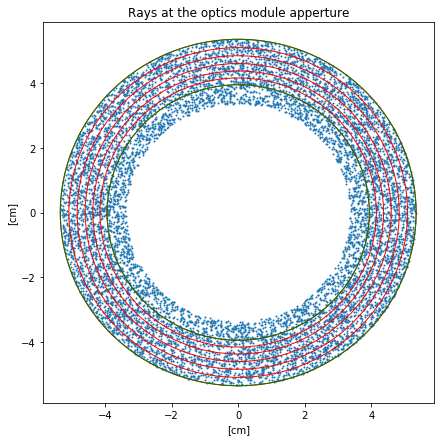

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7))
ax = fig.gca()
# Plot Shells
FrontRadii = [5.345, 5.085, 4.835, 4.595, 4.365, 4.15, 3.94]
for r in FrontRadii:
    c = plt.Circle((0, 0), r, color='r',fill=False)
    ax.add_artist(c)

# Plot limits in green
r0, r1 = 5.340631866960363, 3.9388715456252426
c = plt.Circle((0, 0), r0, color='g',fill=False)
ax.add_artist(c)
c = plt.Circle((0, 0), r1, color='g',fill=False)
ax.add_artist(c)

# Plot random points
targetX, targetY = target[:,0], target[:,1]
plt.scatter(targetX,targetY,s=1)
plt.title('Rays at the optics module apperture')
plt.xlabel('[cm]')
plt.ylabel('[cm]')
plt.show()

* Pretty homogeneus. <br>
* Why there are not rays below shell #7?

Let's see what ***module.targetFront*** is doing

### Takehome message: <br>
* We need to include the actual core radious in the simulation. I sent an email to Patrick asking for this information.

## Rays initial distribution

In [7]:
#source = Source()
source = Source(type='point')
module = Module(core_radius=2.805) # Core radious = 2.0cm
rays = source.generateRays(module.targetFront,n)
posRays = [ray.ori for ray in rays]

r0 =  5.340631866960363
r1 =  2.805


### Visualizing Rays Orientation

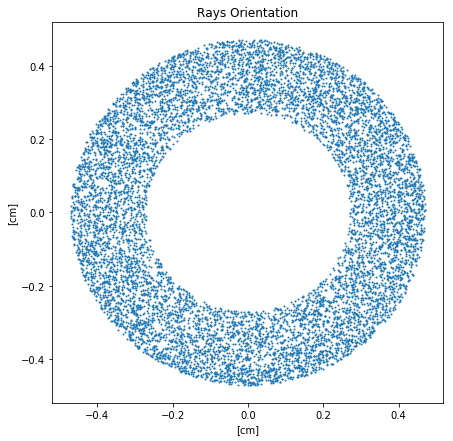

In [8]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca()
# Plot Shells
FrontRadii = [5.345, 5.085, 4.835, 4.595, 4.365, 4.15, 3.94]
for r in FrontRadii:
    c = plt.Circle((0, 0), r, color='r',fill=False)
    ax.add_artist(c)

# Plot limits in green
r0, r1 = 5.340631866960363, 3.9388715456252426
c = plt.Circle((0, 0), r0, color='g',fill=False)
ax.add_artist(c)
c = plt.Circle((0, 0), r1, color='g',fill=False)
ax.add_artist(c)

# Plot random points
targetX, targetY = [], []
for pos in posRays:
    targetX.append(pos[0])
    targetY.append(pos[1])
plt.scatter(targetX,targetY,s=1)
plt.title('Rays Orientation')
plt.xlabel('[cm]')
plt.ylabel('[cm]')
plt.show()

## Now an off-axis source

In [13]:
import numpy as np
## Source distance and off-axis angle in arcmin
Sdist = -10        ## cm
offaxisAngle = 5000.0 ## arcmin
source = Source(type='point',center=[0, 3, -10 ])
center = (0,3,-10)
center = center/np.linalg.norm(center)
#source = Source(type='point',center=[0, -Sdist * np.sin(np.deg2rad(offaxisAngle / 60.0)), Sdist ])
rays = source.generateRays(module.targetFront,n)
posRays = [ray.ori + center for ray in rays]

r0 =  5.340631866960363
r1 =  2.805


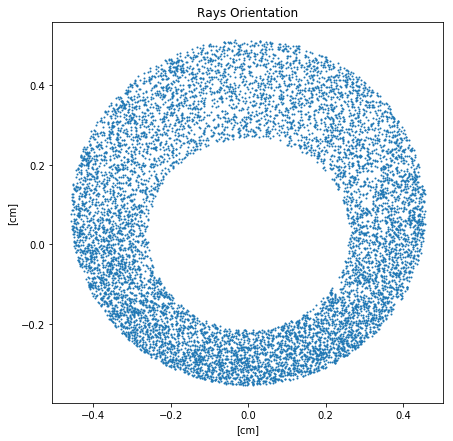

In [14]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca()
# Plot Shells
FrontRadii = [5.345, 5.085, 4.835, 4.595, 4.365, 4.15, 3.94]
for r in FrontRadii:
    c = plt.Circle((0, 0), r, color='r',fill=False)
    ax.add_artist(c)

# Plot limits in green
r0, r1 = 5.340631866960363, 3.9388715456252426
c = plt.Circle((0, 0), r0, color='g',fill=False)
ax.add_artist(c)
c = plt.Circle((0, 0), r1, color='g',fill=False)
ax.add_artist(c)

# Plot random points
targetX, targetY = [], []
for pos in posRays:
    targetX.append(pos[0])
    targetY.append(pos[1])
plt.scatter(targetX,targetY,s=1)
plt.title('Rays Orientation')
plt.xlabel('[cm]')
plt.ylabel('[cm]')
plt.show()

## Is this distribution homogeneus in $\theta$ ?

In [15]:
r = np.sqrt(np.array(targetX)**2 + np.array(targetY)**2)
alpha = np.arctan2(np.array(targetY), np.array(targetX))

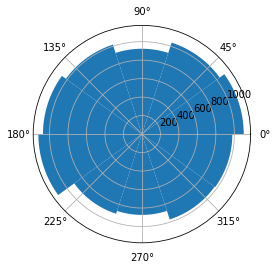

In [20]:
ax = plt.subplot(111,projection='polar')
ax.hist(alpha)
#plt.hist(alpha)
plt.show()

### Pretty homogeneous

So far I don't see gaps in the distribution. The task for today is to pass rays through the module and check the angular distribution after bounces.

This test is made in notebook named ***Source_Debugging_01***

#### Off-axis target

In [22]:
OriRays = [ray.ori for ray in rays]
PosRays = [ray.pos for ray in rays]
TarRays = OriRays + PosRays

In [20]:
print('X = ', targetX[100])
print('Y = ', targetY[100])
print('R = ', np.sqrt(targetX[100]**2 + targetY[100]**2))
print('r = ', r[100])
print('alpha = ', np.arcsin(np.array(targetY[100]) / r[100]))

X =  -0.103808218374
Y =  0.329440941775
R =  0.345409149155
r =  0.345409149155
alpha =  1.26554072761


## Pie chart on polar axis Example

In [56]:
width

array([ 0.        ,  0.03926991,  0.07853982,  0.11780972,  0.15707963,
        0.19634954,  0.23561945,  0.27488936,  0.31415927,  0.35342917,
        0.39269908,  0.43196899,  0.4712389 ,  0.51050881,  0.54977871,
        0.58904862,  0.62831853,  0.66758844,  0.70685835,  0.74612826])

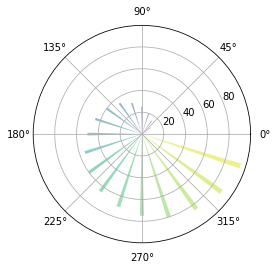

In [79]:
# Compute pie slices
N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.linspace(0.0, 10, N, endpoint=False)
#radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.linspace(0.0, 1.0, N, endpoint=False)
#width = np.pi / 4 * np.random.rand(N)

ax = plt.subplot(111,projection='polar')
bars = ax.bar(theta, radii,width=0.05)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.viridis(r / 100.))
    bar.set_alpha(0.5)

plt.show()

In [49]:
radii

array([ 1.04575896,  6.7287928 ,  2.1278559 ,  2.41053037,  9.52848656,
        4.64505995,  3.65656317,  1.91837773,  3.01852285,  2.25051611,
        6.02702677,  0.80558611,  7.6387533 ,  8.50686621,  7.86901897,
        8.77841003,  6.06258244,  3.61393893,  6.46569337,  7.98847962])